In [3]:
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
image = PIL.Image.open("chest_xray/train/PNEUMONIA/person1002_bacteria_2933.jpeg")

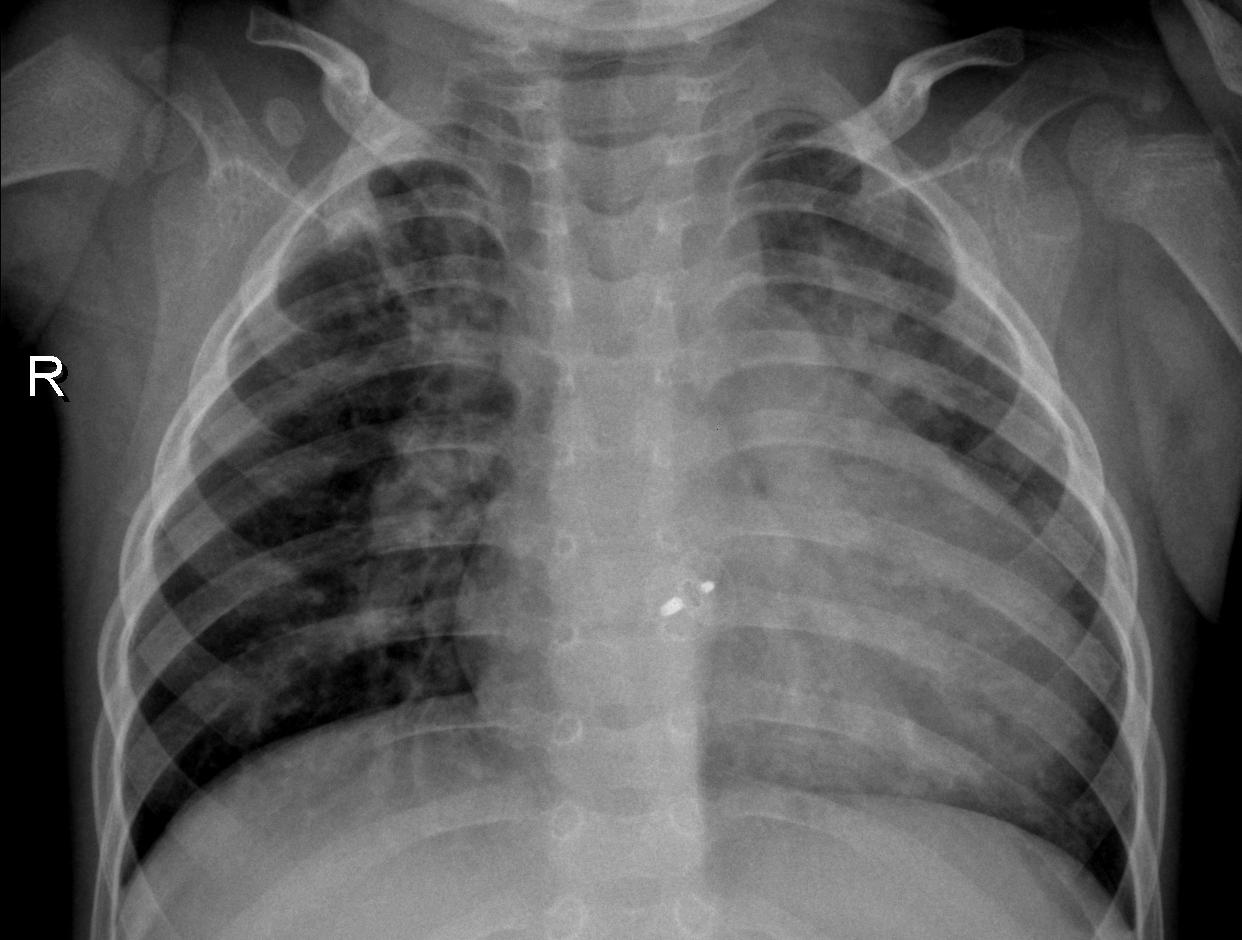

In [8]:
image

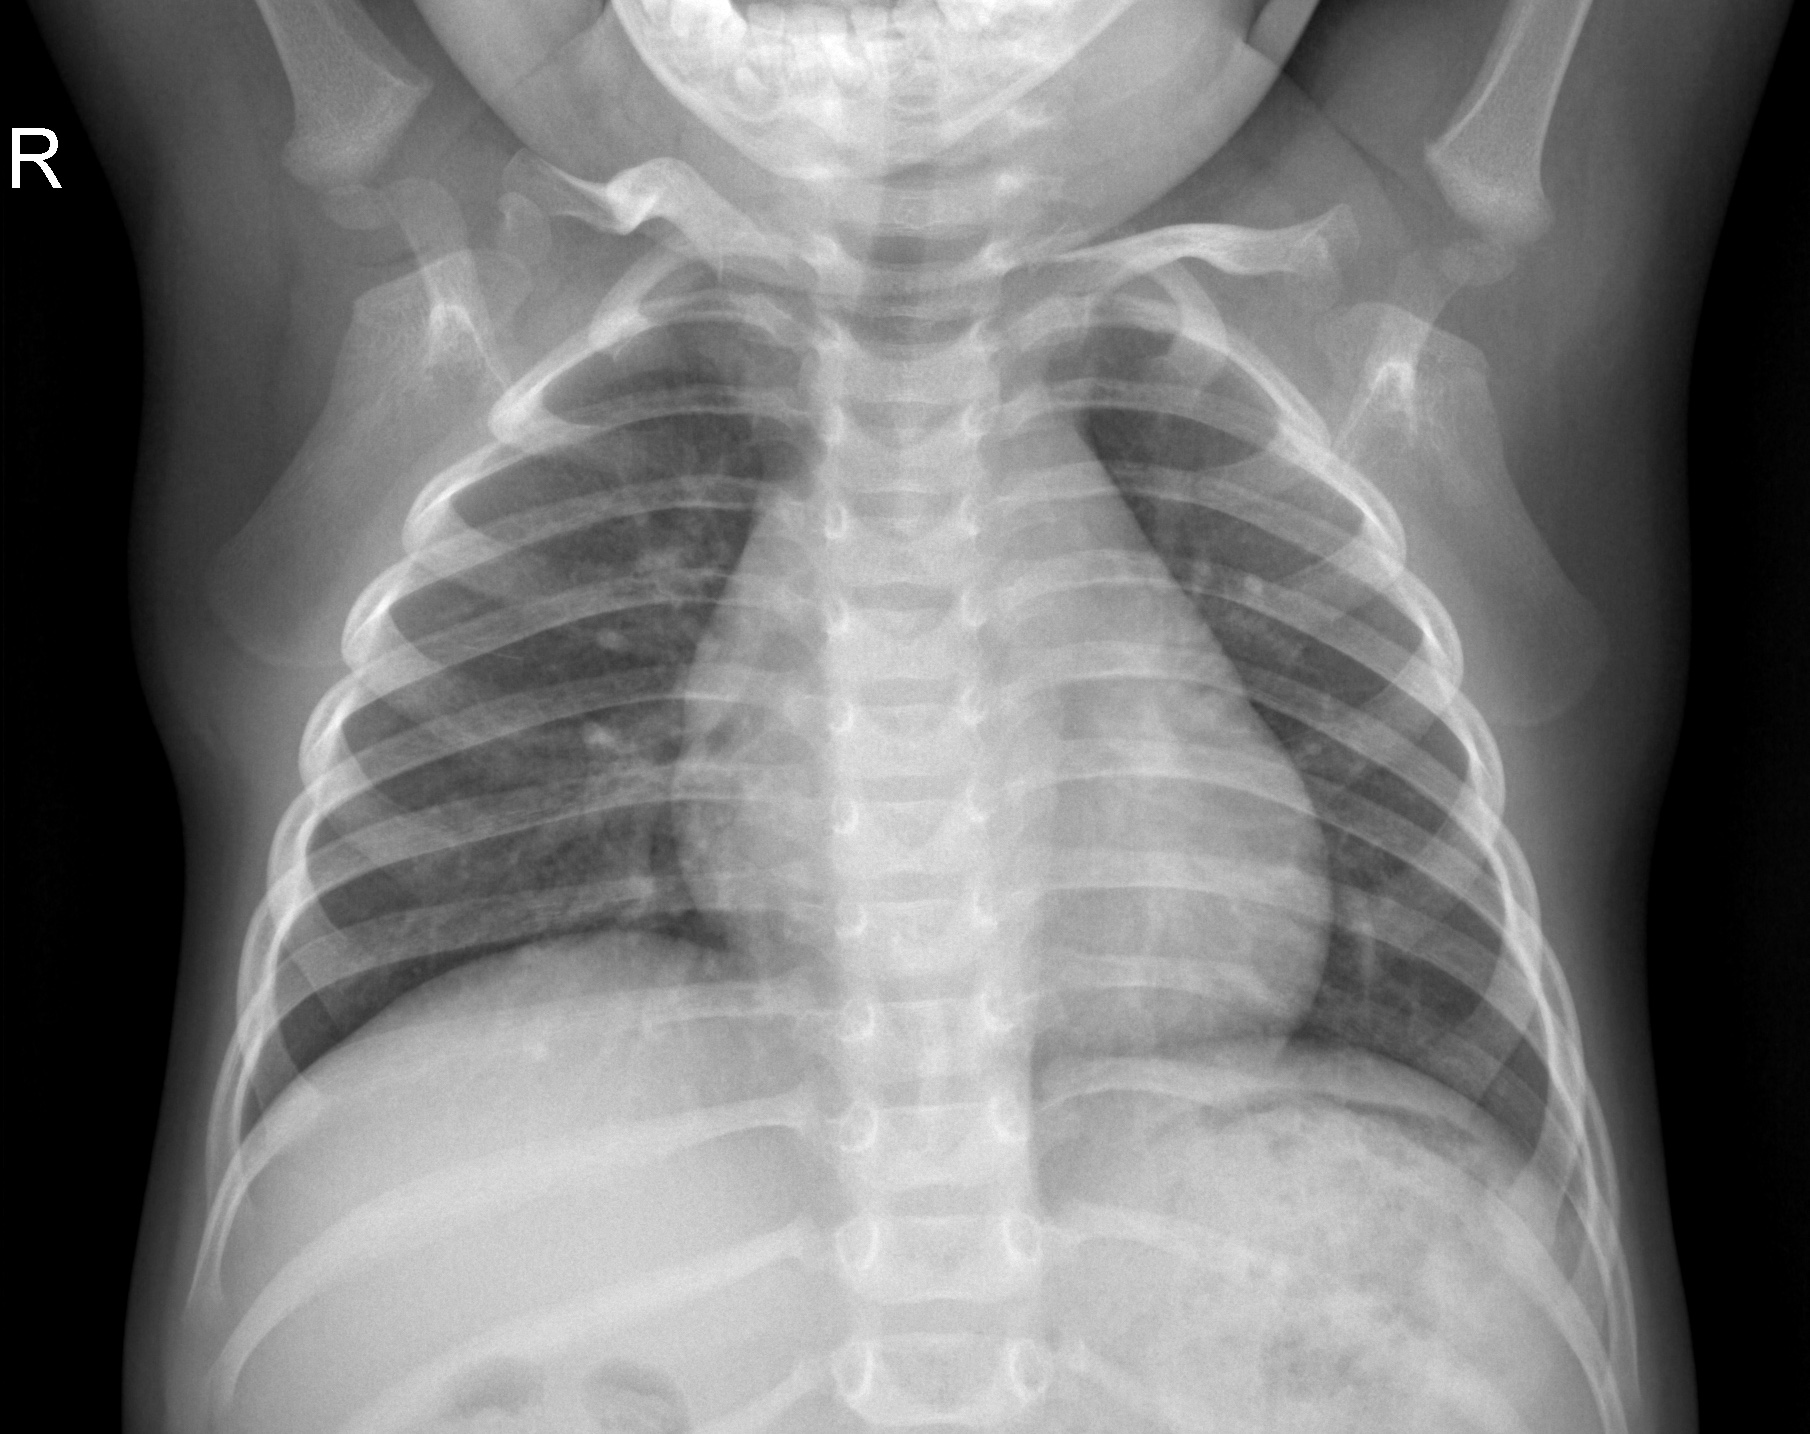

In [9]:
image_normal = PIL.Image.open("/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0119-0001.jpeg")
image_normal

In [11]:
# Importing the ImageDataGenerator module from the TensorFlow Keras library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [47]:
# Directory containing the training images
training_dir = "chest_xray/train"

# Creating an ImageDataGenerator to preprocess the training data
training_generator = ImageDataGenerator(rescale=1/255)  # Rescaling pixel values to a range of [0, 1]

# Generating batches of augmented/normalized data from the directory
data_train = training_generator.flow_from_directory(
    training_dir,               # Directory containing the training images
    target_size=(120, 120),     # Resizing images to 120x120 pixels
    batch_size=8,               # Size of the batches of data (8 images per batch)
    class_mode="binary"         # Type of classification (binary in this case)
)


Found 5216 images belonging to 2 classes.


In [48]:
# Directory containing the validation images
valid_dir = "chest_xray/val"

# Creating an ImageDataGenerator to preprocess the validation data
valid_generator = ImageDataGenerator(rescale=1/255)  # Rescaling pixel values to a range of [0, 1]

# Generating batches of augmented/normalized data from the validation directory
data_valid = valid_generator.flow_from_directory(
    valid_dir,                  # Directory containing the validation images
    target_size=(120, 120),     # Resizing images to 120x120 pixels
    batch_size=8,               # Size of the batches of data (8 images per batch)
    class_mode="binary"         # Type of classification (binary in this case)
)


Found 16 images belonging to 2 classes.


In [56]:
# Directory containing the test images
test_dir = "chest_xray/test"

# Creating an ImageDataGenerator to preprocess the test data
test_generator = ImageDataGenerator(rescale=1/255)  # Rescaling pixel values to a range of [0, 1]

# Generating batches of augmented/normalized data from the test directory
data_test = test_generator.flow_from_directory(
    test_dir,                   # Directory containing the test images
    target_size=(120, 120),     # Resizing images to 120x120 pixels
    batch_size=8,               # Size of the batches of data (8 images per batch)
    class_mode="binary"         # Type of classification (binary in this case)
)


Found 624 images belonging to 2 classes.


In [51]:
# Creating a sequential model using TensorFlow Keras
model = tf.keras.Sequential([
    # Convolutional layers with max pooling
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(120, 120, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Flatten layer to convert 2D data to 1D
    tf.keras.layers.Flatten(),
    
    # Dense (fully connected) layers
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")  # Output layer with sigmoid activation for binary classification
])


In [53]:
# Compiling the model using Adam optimizer, binary cross-entropy loss, and accuracy metric
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Using Adam optimizer with learning rate 0.001
    loss="binary_crossentropy",  # Binary cross-entropy loss for binary classification
    metrics=["acc"]  # Monitoring model accuracy during training
)


In [54]:
# Training the model using the fit_generator method
history = model.fit_generator(
    data_train,             # Training data generator
    epochs=2,               # Number of epochs (iterations over the entire dataset)
    validation_data=data_valid  # Validation data to evaluate the model's performance after each epoch
)


Epoch 1/2


/tmp/ipykernel_42/3227875826.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_train, epochs=2, validation_data=data_valid)


652/652 [==============================] - 111s 167ms/step - loss: 0.4870 - acc: 0.7862 - val_loss: 0.5142 - val_acc: 0.7500
Epoch 2/2
652/652 [==============================] - 108s 166ms/step - loss: 0.2183 - acc: 0.9110 - val_loss: 0.7683 - val_acc: 0.7500


In [57]:
# Evaluating the model on the test data
model.evaluate(data_test)

78/78 [==============================] - 11s 138ms/step - loss: 0.8661 - acc: 0.6875


[0.8660870790481567, 0.6875]

In [60]:
# Generating predictions using the trained model on the test data
predictions = model.predict(data_test)

78/78 [==============================] - 7s 92ms/step


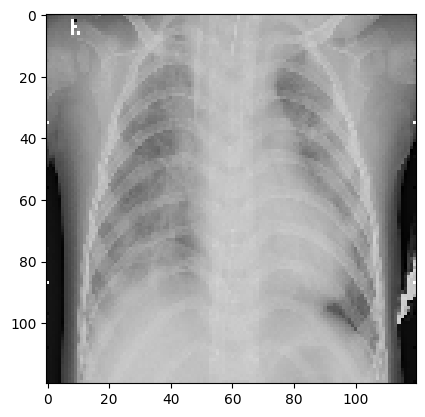

La probabilite d'avoir une pneumonie est de : [0.9998386]


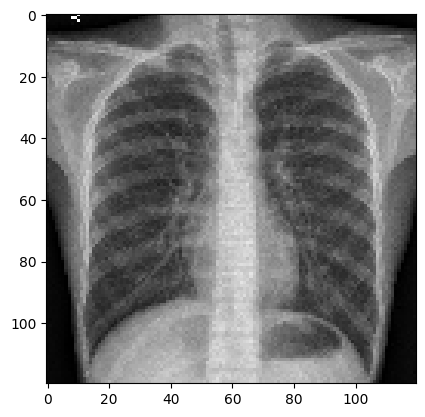

La probabilite d'avoir une pneumonie est de : [0.06017543]


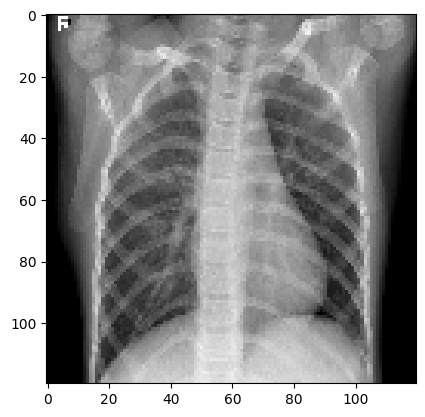

La probabilite d'avoir une pneumonie est de : [0.99818045]


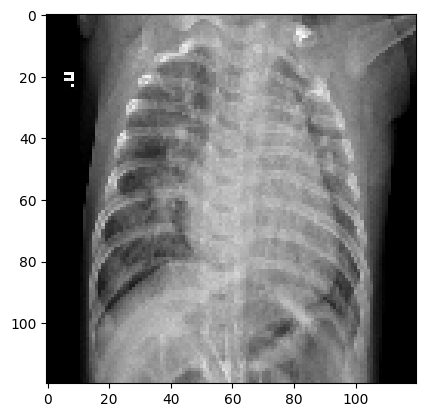

La probabilite d'avoir une pneumonie est de : [0.74891627]


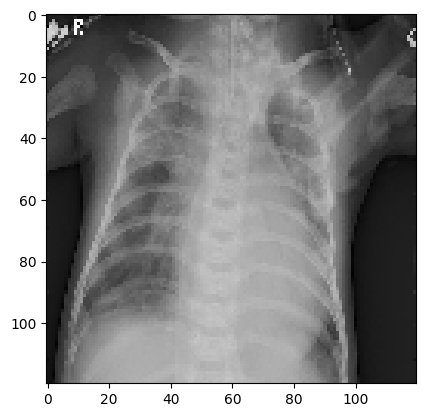

La probabilite d'avoir une pneumonie est de : [0.99868596]


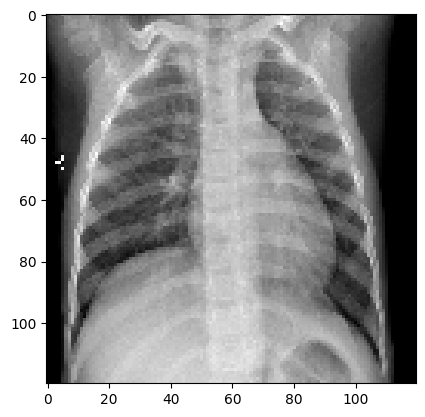

La probabilite d'avoir une pneumonie est de : [0.99812144]


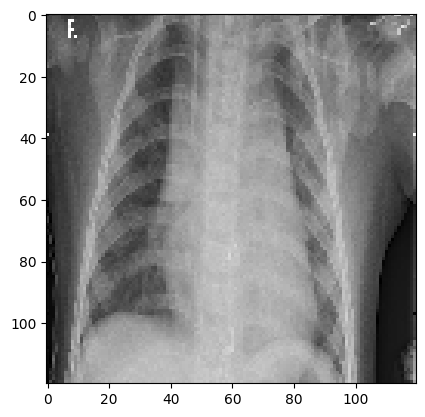

La probabilite d'avoir une pneumonie est de : [0.61990184]


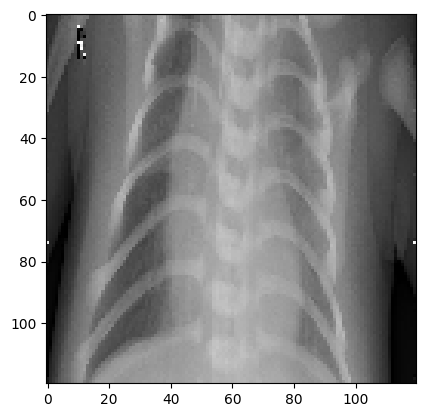

La probabilite d'avoir une pneumonie est de : [0.6817682]


IndexError: index 8 is out of bounds for axis 0 with size 8

In [63]:
# Retrieving a batch of images from the test data generator
x = data_test.next()

# Iterating through the first batch of data
for i in range(0, 1):  # For each batch (in this case, just one)
    image = x[i]  # Get the current image batch
    for j in range(0, 16):  # For each image in the batch (16 images in this case)
        # Displaying the image
        plt.imshow(image[j])  # Show the j-th image in the batch
        plt.show()
        
        # Displaying the predicted probability of pneumonia for each image
        print("La probabilite d'avoir une pneumonie est de :", predictions[j])
